In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('ggplot')

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X_cols = df.columns.values
X_cols

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype=object)

In [6]:
X = df.values
X.shape

(569, 30)

# StandardScaler

La estandarización es una técnica de escalado en la que hace que los datos no tengan escala convirtiendo la distribución estadística de los datos en el siguiente formato

media-0
desviación estándar-1

$$z= \frac{x-\mu}{\sigma}$$

La función *StandardScaler* nos permite estandarizar los datos en un formato estándar.


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)



In [8]:
cov_m = np.cov(X_scaled.T)
cov_m.shape

(30, 30)

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)

In [10]:
eigenvalues

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [11]:
eigenvalues.shape


(30,)

In [12]:
eigenvectors.shape


(30, 30)

In [13]:
eigenvectors = eigenvectors.T

In [14]:
eigenvectors[0, :]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [15]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99453783,
       0.99456279, 0.99461577, 0.99484578, 0.99511837, 0.99563442,
       0.99623625, 0.99704761, 0.99796226, 0.9990009 , 1.        ])

In [16]:
p = eigenvectors [0:10, :]
p.shape

(10, 30)

In [17]:
data_new = np.dot(p, X_scaled.T)
data_new.shape


(10, 569)

In [18]:
data_new = data_new.T
data_new.shape

(569, 10)

In [41]:
df_new = pd.DataFrame(data_new, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10'])

df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,-2.159370,0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,-0.013358,-0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,0.668166,-0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,-1.429911,-1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,0.936213,-0.636376,-0.263805,0.377704


## Ploteo en 2D

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'label'],
      dtype='object')


<Axes: xlabel='PC1', ylabel='PC2'>

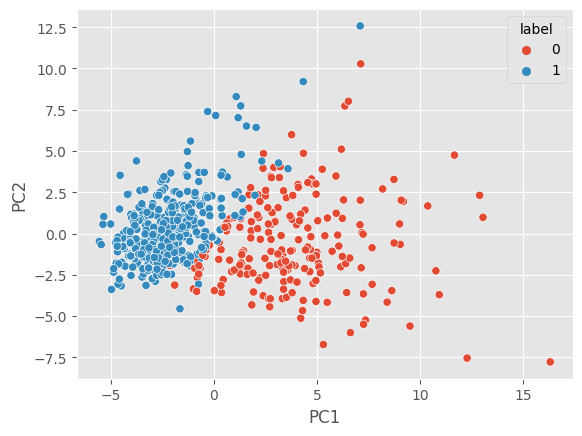

In [42]:
labels = pd.DataFrame(data=cancer.target)
labels = labels.rename(columns={0: 'label'})
df_new = pd.concat([df_new, labels], axis=1, join="inner")
print(df_new.columns)


sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_new)

In [32]:
df_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,-2.159370,0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,-0.013358,-0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,0.668166,-0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,-1.429911,-1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,0.936213,-0.636376,-0.263805,0.377704,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0.074824,-2.375193,0.596130,0.035471,0.987929,0.256989,0
565,3.793382,-3.584048,2.088476,-2.506028,0.510723,-0.246710,0.716326,1.113360,-0.105207,-0.108632,0
566,1.256179,-1.902297,0.562731,-2.089227,-1.809991,-0.534447,0.192758,-0.341887,0.393917,0.520877,0
567,10.374794,1.672010,-1.877029,-2.356031,0.033742,0.567936,-0.223082,0.280239,-0.542035,-0.089296,0


## Ploteo en 3D

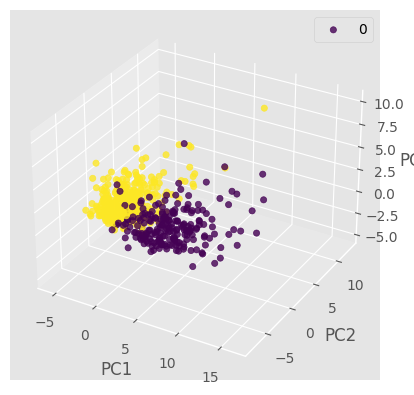

In [ ]:
from matplotlib.colors import ListedColormap

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_new['PC1']
y = df_new['PC2']
z = df_new['PC3']

colors = ListedColormap(["blue", "red"])


#labels = pd.DataFrame(data=cancer.target)
#labels = labels.rename(columns={0: 'label'})
#df_new = pd.concat([df_new, labels], axis=1, join="inner")

ax.scatter(x,y,z, marker='o', c=df_new['label'],alpha=0.8)


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(df_new['label'],loc="upper right")
plt.show()

In [ ]:
from sklearn import preprocessing

x = df_new.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_new_norm = pd.DataFrame(data=x_scaled, columns=df_new.columns)


In [ ]:
print(df_new_norm)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.674370  0.477882  0.250600  0.848906  0.707287  0.601924  0.342863   
1    0.363425  0.196947  0.290211  0.605354  0.559333  0.454066  0.568714   
2    0.516319  0.329287  0.288713  0.585391  0.624386  0.508899  0.640439   
3    0.579790  0.887090  0.109891  0.511852  0.851078  0.777501  0.419633   
4    0.434135  0.286391  0.418210  0.781800  0.565443  0.319854  0.668648   
..        ...       ...       ...       ...       ...       ...       ...   
564  0.548552  0.206350  0.489559  0.611071  0.616059  0.197025  0.632857   
565  0.427651  0.205995  0.464813  0.254444  0.651555  0.424621  0.645507   
566  0.311717  0.288640  0.363047  0.294799  0.462573  0.393854  0.590406   
567  0.728378  0.464290  0.200318  0.268967  0.612713  0.511731  0.546642   
568  0.004135  0.349167  0.424925  0.274473  0.625007  0.623996  0.391318   

          PC8       PC9      PC10  label  
0    0.572513  0.416412  0.31374

In [ ]:
import plotly.express as px

fig = px.scatter_ternary(df_new_norm, a="PC1", b="PC2",c="PC3")#,color="label",color_discrete_map = {0: "blue", 1: "green"}
fig.show()